# Introductory EDA & Feature Engineering for ML Solutions

> ## Introduction 

This notebook aims at using the ```carDekho webscraped dataset``` to ilustrate:
1. Feature Scaling 
2. Encoding / Transformaton
3. Feature Engineering 
4. Feature Generation
5. Perform Statistical Data Analysis on the Dataset
6. Perform an EDA
7. Formulate and reverse engineer questions regarding the dataset.
8. Prepare the Dataset for applying Linear Regression Model, by making use of "Price" as the target variable. 
    
---
> ## Objectives  

- To be able to perform a lab program with neat documentation
- To encode and scale variables with logic and sense.
- To make a data ready for linear regression using data transformation
- To perform quick EDA based on a dataset.

---
> ## Problem Statement

Cleaning and transforming the webscrapped car selling website's dataset, prepping it for linear regression and performing statistical analysis and EDA on it.

---
> ## Approach / Methods 

1. Importing the dataset using panda's inbuilt method ```read_excel```.
2. Creating a user defined function that takes an object, and file name as arguments. It then uses ```pickle``` library's method ```.dump()``` to serialize the python byte data stream. Exporting the learners (encoders) using the created function.
3. Performing Label Encoding, MinMax Scalling, Oridnal Encoding and OneHot Encoding on all the features, so that the linear regression model can learn with ease. 
4. Performing Statistical Analysis using countplots, distribution plots and correlation heatmaps.
5. Crearting 6 interesting question and perfrorming and EDA in a visually appealing manner using line plots, scatter plots, pie charts, box plots, etc.
6. Exporting the transformed dataset into a csv file, for future linear regression.

---
> ## Observations 

### About the dataset

-This dataset contains 8 columns of information related to various car models, including the model name, age of the car, odometer reading, fuel type, gear system, and number of previous owners. The main focus of the dataset is the price of the cars, which is the target variable. During the process of feature selection, other variables that are relevant to predicting the price will be selected as well. Overall, this dataset provides a comprehensive description of different car models and their prices.

### STATISTICAL ANALYSIS

__Statistical Analysis on the dataset__

- There are no null values in the dataset.

- Price (Target Variable), does'nt have a strong positive or negative correlation with any feature. But it is heavily dependednt (positive correlation) on Age of the car. It also has weak negative correlation with Distance, Fuel Type and Number of owners.

- __Price Feature Spread__: Price data is highy concentrated around Rs. 1,00,000 - Rs. 15,00,000, and the data is extremely right skewed.

- __Age Of Car Feature Spread__: Although the car age data has a wide range, its highly concentrated from 5 to 12 years.


- __Odometer Feature Spread__:The odometer reading is highly concentrated between 20,000 kms and 160,000 Kms. The data is extremely right skewed.

- The graph is supporting basic common sense that when the car travels more, the car depreciates in value. There is a strong non-linear relationship between Price and OdoMeterReading.

- It can be observed that Maruti has the highest number of cars listed on teh website the data was webscrapped from followed by Hyundai, Tata and Mahindra. The proportion of Automatic to Non-Automatic cars is also steep in nature.

### EDA

__Does the age of the car affect the price ?__

- The age of car and price are inversely related, as the age of car increases the price its listed at decreases. Although, there is a small spike from 1 to 4 years, where the price surprisingly increases. This could be either because of well, maintanance or other market factors.


__Do the number of owners, that have owned a car impact its price ?__

- It can be understood from the dataset that as the car switches more hands, the price depreciates. The more the number of owners have been, the lesser the listed price. 

- Test drive cars have the highest average price, as they are probably the least used.

__What fuel type cars are mostly listed on the webscrapped dataset ?__

- It can be observed that majority of the cars run on "Diesel", closely followed by Petrol. The least number of cars run "Battery (electric)", i.e. only one car.


__Are there some particular brands that a dealer type sells?__

- Trustmark Broker is only reserved for Ford, Mahindra, Toyota, Hyundai, Maruti, Honda and Renault. These brands generally target the average consumer / mass.
- Direct Owner, covers almost all different brands and also different vantage points.

__How does the number of previous owners affect the selling price of the car?__

- Diesel Cars are slightly pricier than other cars. LPG and CNG cars seems to be listed with a cheaper price tag. What's interesting to note is that the most expensive car listed on the website is a petrol car, Its a seven year old, 2019 AUDI RS7 Sportback Performance Sports Car, listed at a whopping 1,11,25,000 rs on the website.


---
> ## Results 

There are no particular results from this lab. We have generated a transformed dataset, which is encoded into numeric values for easing further linear regeression. From exploring the dataset, we could see, although the correlation between the variables is low, there is high dependance of price on factors like age of the car, odometer reading and number of owners the car has passed through.

---

> ## Learnings

The lab gave me an insight on how to prepare a dataset for linear regression using the available measures like encoding and scaling. It also helped me realise that my EDA skills have improved, and performing a quick EDA can be hassle free and seamless, this can be credited to my __previous semester's data analytics subject__, where i was expossed to __seaborn, matplotliib and pandas library__.

---
> ## References

1. Sklearn Documentation: https://scikit-learn.org/stable/
2. Matplot Library Documnentaion: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html 
3. GeeksForGeeks: https://www.geeksforgeeks.org/ 
4. StackOverflow: https://stackoverflow.com/ 

---


### Importing the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import pickle

warnings.filterwarnings("ignore")

# Importing the dataset

In [2]:
df = pd.read_excel("carDekho_dataset.xlsx")
df.head()

,CarModel,AgeOfCar,Price,OdoMeterReading,Unnamed: 4,DealingType,GearSystem,NoOfOwners
0,Ford Figo Aspire 1.5 TDCi Trend,8,574998.75,152620,Diesel,Broker,Manual,First Owner
1,Mahindra Scorpio SLE BSIV,11,656250.00,149000,Diesel,Direct Owner,Manual,First Owner
2,Tata Manza Club Class Quadrajet90 LS,9,250000.00,104000,Diesel,Direct Owner,Manual,First Owner
3,Toyota Corolla Altis 1.8 VL AT,13,437500.00,84000,Petrol,Direct Owner,Automatic,Third Owner
4,Tata Indigo CS eLS BS IV,12,225000.00,124000,Diesel,Direct Owner,Manual,First Owner


---
__Method:__

Importing the dataset using panda's inbuilt method ```read_excel```.

__Observation:__

This dataset contains 8 columns of information related to various car models, including the model name, age of the car, odometer reading, fuel type, gear system, and number of previous owners. The main focus of the dataset is the price of the cars, which is the target variable. During the process of feature selection, other variables that are relevant to predicting the price will be selected as well. Overall, this dataset provides a comprehensive description of different car models and their prices.

---

# Data Transformation

__User Defined function to pickle objects__

In [3]:
#Creating a user-defined function to pickle a file
def pickle_file(obj,file_name):
    pickle.dump(obj, open ("pickled_files/"+file_name, 'wb')) 

---
__Method:__

Creating a user defined function that takes an object, and file name as arguments. It then uses ```pickle``` library's method ```.dump()``` to serialize the python byte data stream.

---

__Renaming "Unnammed: 4 " Column__

In [4]:
df["Unnamed: 4"].unique()

array(['Diesel', 'Petrol', 'CNG', 'Electric', 'LPG'], dtype=object)

In [5]:
df.rename(columns = {"Unnamed: 4" : "FuelType"}, inplace = True)

__Creating an aditional column "Brand" from carModel__

In [6]:
brands = []
for x in df.CarModel:
    particular_brand = ""
    for letter in x:
        if letter!=" ":
            particular_brand = particular_brand + letter
        else:
            brands.append(particular_brand)
            break

df["Brand"] = brands

In [7]:
df.head()

,CarModel,AgeOfCar,Price,OdoMeterReading,FuelType,DealingType,GearSystem,NoOfOwners,Brand
0,Ford Figo Aspire 1.5 TDCi Trend,8,574998.75,152620,Diesel,Broker,Manual,First Owner,Ford
1,Mahindra Scorpio SLE BSIV,11,656250.00,149000,Diesel,Direct Owner,Manual,First Owner,Mahindra
2,Tata Manza Club Class Quadrajet90 LS,9,250000.00,104000,Diesel,Direct Owner,Manual,First Owner,Tata
3,Toyota Corolla Altis 1.8 VL AT,13,437500.00,84000,Petrol,Direct Owner,Automatic,Third Owner,Toyota
4,Tata Indigo CS eLS BS IV,12,225000.00,124000,Diesel,Direct Owner,Manual,First Owner,Tata


__Creating a copy of the dataset__

In [8]:
trans_df = df.copy()

__Checking number of unique values in the dataset__
- Label Encoding columns with more than 3 unique values
- OneHotEncoding columns with less than or equal to 3 unique values

In [9]:
df.nunique()

CarModel           1491
AgeOfCar             27
Price               445
OdoMeterReading     770
FuelType              5
DealingType           3
GearSystem            2
NoOfOwners            5
Brand                29
dtype: int64

__Ordinal Encoding__

In [10]:
col = "NoOfOwners"

dict_map ={} #dictionary that stores the mapping
pre_val = list(trans_df[col].unique())
    
oe_fuelType = OrdinalEncoder()    
    

trans_df[col] = oe_fuelType.fit_transform(trans_df[[col]])
map_val = list(trans_df[col].unique())
    
for x in range(0,len(pre_val)):
    dict_map[pre_val[x]] = map_val[x]

In [11]:
pickle_file(oe_fuelType,"ordinal_encoder_owners.pickle")   

__Label Encoding__

In [12]:
#Function to perform label encoding on any column
def labelEncode(df,col):
    dict_map ={} #dictionary that stores the mapping
    
    pre_val = list(df[col].unique())
    
    le = LabelEncoder()
    
    #DUMP LE
    df[col] = le.fit_transform(df[col])
    
    map_val = list(df[col].unique())
    
    for x in range(0,len(pre_val)):
        dict_map[pre_val[x]] = map_val[x]
        
    
        
    return dict_map,le

In [13]:
Fuel_le_map, fuel_le = labelEncode(trans_df,"FuelType")
pickle_file(fuel_le,"lable_encoder_fuel.pickle")                  
                       
brand_le_map, brand_le  = labelEncode(trans_df,"Brand")
pickle_file(brand_le,"lable_encoder_brands.pickle")

In [14]:
Fuel_le_map

{'Diesel': 1, 'Petrol': 4, 'CNG': 0, 'Electric': 2, 'LPG': 3}

In [15]:
brand_le_map

{'Ford': 8,
 'Mahindra': 17,
 'Tata': 25,
 'Toyota': 26,
 'Skoda': 24,
 'Hyundai': 10,
 'Maruti': 18,
 'Datsun': 5,
 'Honda': 9,
 'Renault': 23,
 'Mitsubishi': 20,
 'Nissan': 21,
 'Volkswagen': 27,
 'Chevrolet': 3,
 'BMW': 2,
 'Jeep': 13,
 'Audi': 1,
 'Mercedes-Benz': 19,
 'Fiat': 6,
 'Volvo': 28,
 'Kia': 14,
 'Ambassador': 0,
 'Land': 15,
 'Jaguar': 12,
 'OpelCorsa': 22,
 'MG': 16,
 'Isuzu': 11,
 'Force': 7,
 'Daewoo': 4}

__One Hot Encoding__

In [16]:
def oneHotEncode(df,col):
    x = list(df[col].unique())
    one_hot_encoder_ranking = OneHotEncoder() 
    enc_ranking = one_hot_encoder_ranking.fit_transform(df[[col]]) 
    df_ranking = pd.DataFrame(enc_ranking.toarray(),columns=x)
    return one_hot_encoder_ranking, df_ranking

In [17]:
dt_oe, df_oe_dt = oneHotEncode(trans_df,"DealingType")
trans_df= pd.concat([trans_df, df_oe_dt],axis=1)
trans_df = trans_df.drop(["DealingType"],axis=1)

In [18]:
gs_oe, df_oe_gs = oneHotEncode(trans_df,"GearSystem")
trans_df= pd.concat([trans_df, df_oe_gs],axis=1)
trans_df = trans_df.drop(["GearSystem"],axis=1)

In [19]:
pickle_file(dt_oe,"onehot_encoder_dealingType.pickle")
pickle_file(gs_oe,"onehot_encoder_gearSystem.pickle")

In [20]:
trans_df.head()

,CarModel,AgeOfCar,Price,OdoMeterReading,FuelType,NoOfOwners,Brand,Broker,Direct Owner,Trustmark Broker,Manual,Automatic
0,Ford Figo Aspire 1.5 TDCi Trend,8,574998.75,152620,1,0.0,8,1.0,0.0,0.0,0.0,1.0
1,Mahindra Scorpio SLE BSIV,11,656250.00,149000,1,0.0,17,0.0,1.0,0.0,0.0,1.0
2,Tata Manza Club Class Quadrajet90 LS,9,250000.00,104000,1,0.0,25,0.0,1.0,0.0,0.0,1.0
3,Toyota Corolla Altis 1.8 VL AT,13,437500.00,84000,4,4.0,26,0.0,1.0,0.0,1.0,0.0
4,Tata Indigo CS eLS BS IV,12,225000.00,124000,1,0.0,25,0.0,1.0,0.0,0.0,1.0


__Scaling__
- MinmaxScaling
- StandardScaling

In [21]:
#minmaxscaling
price_mx = MinMaxScaler(feature_range=(0,100)) 
price_mx.fit(trans_df[["Price"]]) 
trans_df["Price"]=price_mx.transform(trans_df[["Price"]])

In [22]:
pickle_file(price_mx,"minMax_scaler_price.pickle")

In [23]:
#standardsclaing
ss_variable = StandardScaler() 
ss_variable.fit(trans_df[["OdoMeterReading"]]) 
trans_df["OdoMeterReading"] = ss_variable.transform(trans_df[["OdoMeterReading"]])

In [24]:
pickle_file(ss_variable,"standard_scaler_odoMeter.pickle")

In [25]:
trans_df.head()

,CarModel,AgeOfCar,Price,OdoMeterReading,FuelType,NoOfOwners,Brand,Broker,Direct Owner,Trustmark Broker,Manual,Automatic
0,Ford Figo Aspire 1.5 TDCi Trend,8,4.954944,1.766863,1,0.0,8,1.0,0.0,0.0,0.0,1.0
1,Mahindra Scorpio SLE BSIV,11,5.686937,1.689245,1,0.0,17,0.0,1.0,0.0,0.0,1.0
2,Tata Manza Club Class Quadrajet90 LS,9,2.027027,0.724381,1,0.0,25,0.0,1.0,0.0,0.0,1.0
3,Toyota Corolla Altis 1.8 VL AT,13,3.716216,0.295553,4,4.0,26,0.0,1.0,0.0,1.0,0.0
4,Tata Indigo CS eLS BS IV,12,1.801802,1.153209,1,0.0,25,0.0,1.0,0.0,0.0,1.0


# Statistical Analysis

In [26]:
#Counting all the unique vales
counts = {}
for x in df.columns:
    counts[x] = df[x].value_counts()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CarModel         4340 non-null   object 
 1   AgeOfCar         4340 non-null   int64  
 2   Price            4340 non-null   float64
 3   OdoMeterReading  4340 non-null   int64  
 4   FuelType         4340 non-null   object 
 5   DealingType      4340 non-null   object 
 6   GearSystem       4340 non-null   object 
 7   NoOfOwners       4340 non-null   object 
 8   Brand            4340 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 305.3+ KB


---
__Obsertvation__

There are no null values in the dataset.

---

In [28]:
df.describe()

,AgeOfCar,Price,OdoMeterReading
count,4340.000000,4.340000e+03,4340.000000
mean,9.909217,6.301591e+05,70215.777419
std,4.215344,7.231859e+05,46644.102194
min,3.000000,2.500000e+04,4001.000000
25%,7.000000,2.609372e+05,39000.000000
50%,9.000000,4.375000e+05,64000.000000
75%,12.000000,7.500000e+05,94000.000000
max,31.000000,1.112500e+07,810599.000000


In [29]:
df.corr()

,AgeOfCar,Price,OdoMeterReading
AgeOfCar,1.000000,-0.413922,0.419688
Price,-0.413922,1.000000,-0.192289
OdoMeterReading,0.419688,-0.192289,1.000000


<AxesSubplot:>

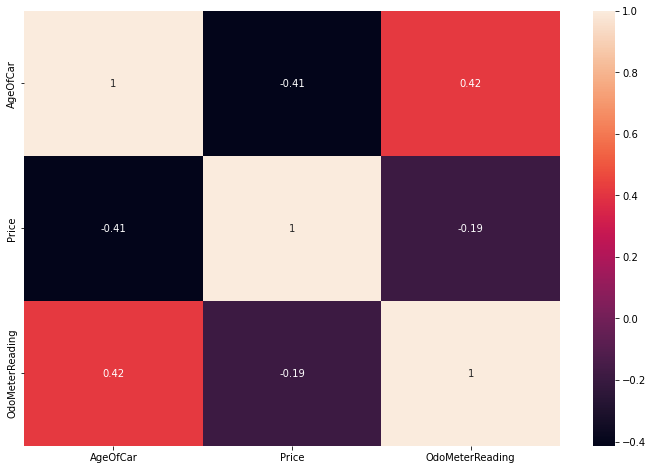

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

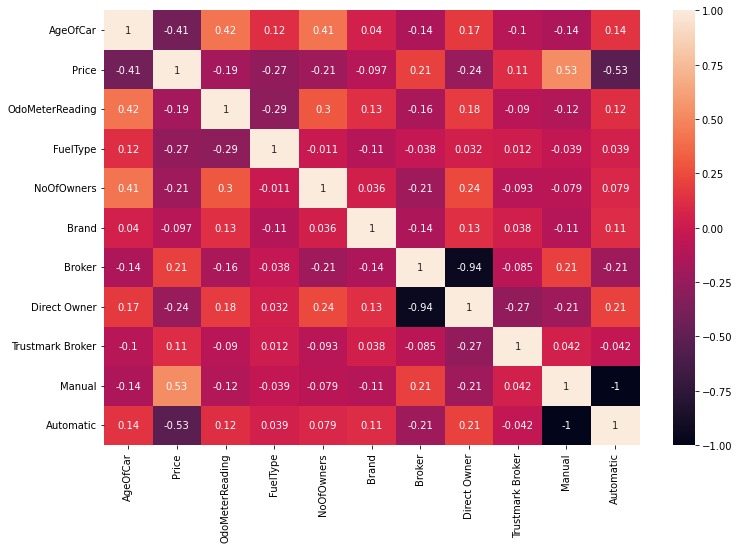

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(trans_df.corr(),annot=True)

---
__Observation__

- Price (Target Variable), does'nt have a strong positive or negative correlation with any feature. But it is heavily dependednt (positive correlation) on Age of the car. It also has weak negative correlation with Distance, Fuel Type and Number of owners.

---

Text(0.5, 1.0, 'Price Data Spread (Distribution)')

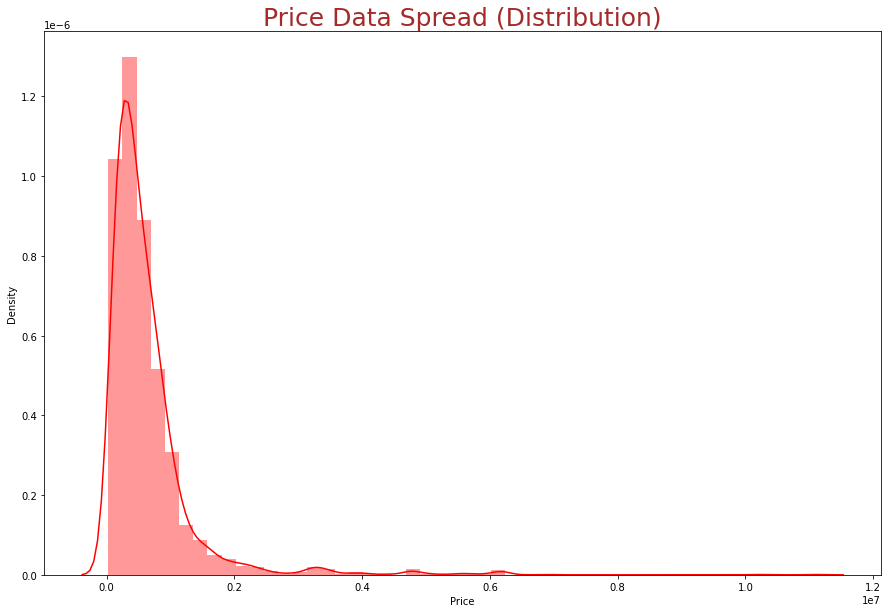

In [139]:
plt.figure(figsize=(15,10))
sns.distplot(df['Price'],color='red')
plt.title("Price Data Spread (Distribution)", c="Brown",fontsize=25)

---
__Observation:__

__Spread__: Price data is highy concentrated around Rs. 1,00,000 - Rs. 15,00,000, and the data is extremely right skewed.

---

Text(0.5, 1.0, 'Age Of the Car Data Spread (Distribution)')

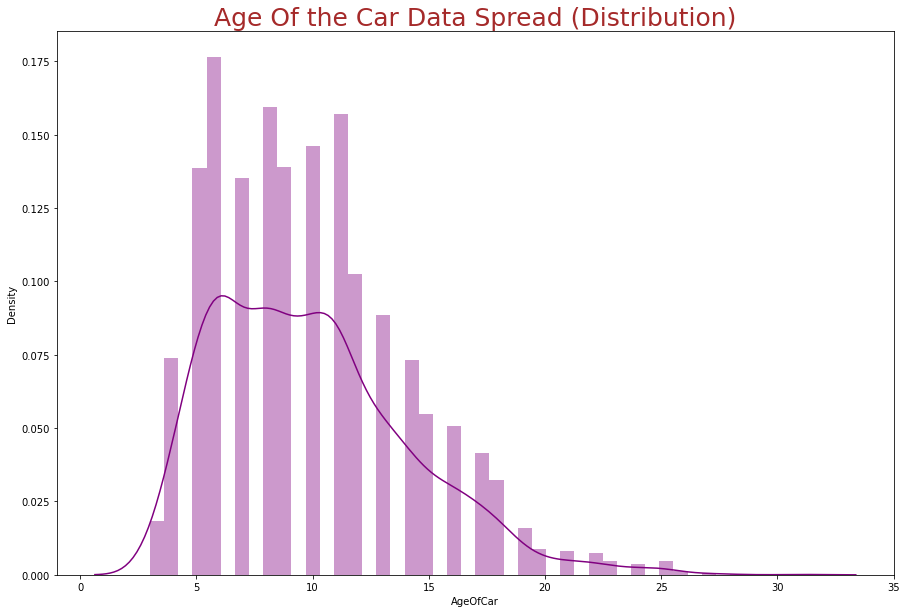

In [138]:
plt.figure(figsize=(15,10))
sns.distplot(df['AgeOfCar'],color='purple')
plt.title("Age Of the Car Data Spread (Distribution)", c="Brown",fontsize=25)

---
__Observation:__

__Spread__: Although the car age data has a wide range, its highly concentrated from 5 to 12 years.

---

Text(0.5, 1.0, 'Odometer Reading Data Spread (Distribution)')

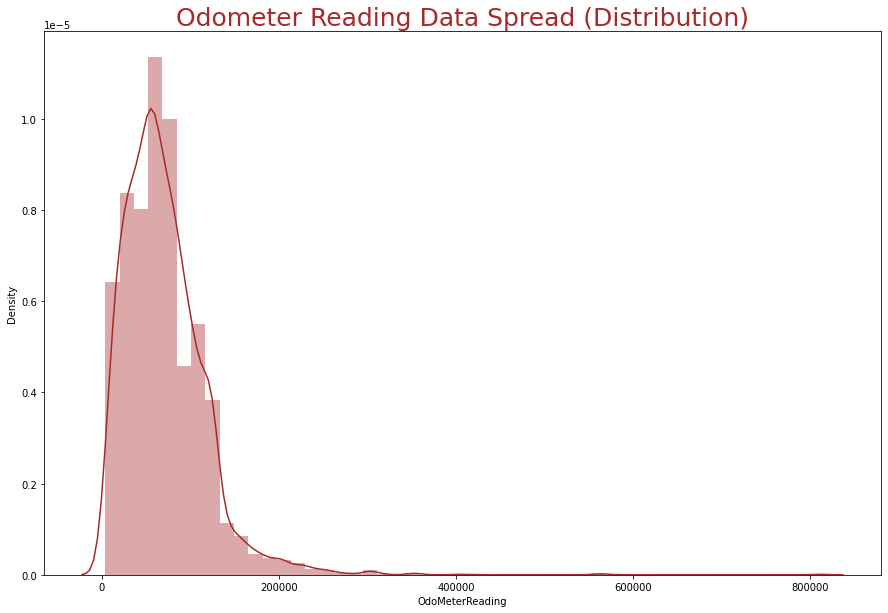

In [137]:
plt.figure(figsize=(15,10))
sns.distplot(df['OdoMeterReading'],color='brown')
plt.title("Odometer Reading Data Spread (Distribution)", c="Brown",fontsize=25)

---
__Observation:__

__Spread__: The odometer reading is highly concentrated between 20,000 kms and 160,000 Kms. The data is extremely right skewed.

---

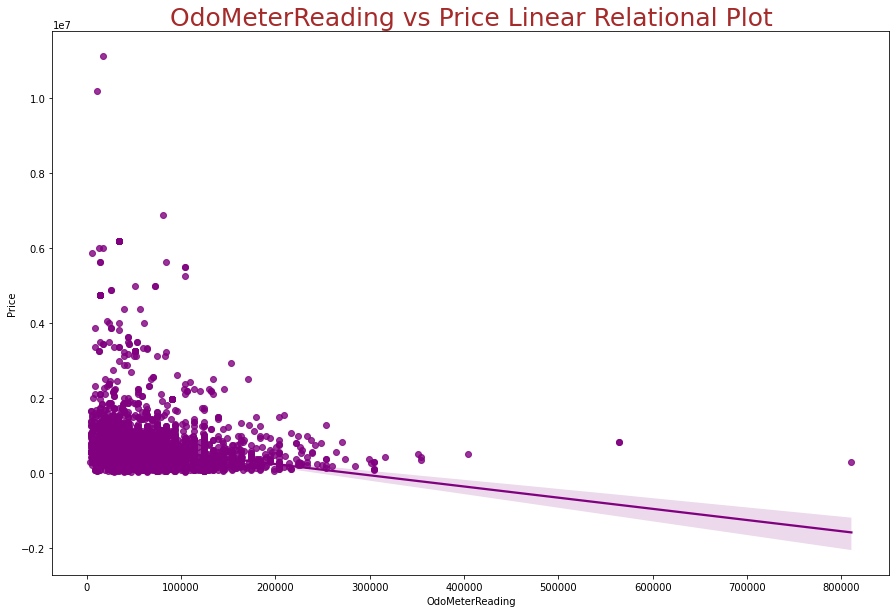

In [92]:
plt.figure(figsize=(15,10))
sns.regplot(data = df, x = 'OdoMeterReading', y = 'Price', label = 'OdoMeterReading vs Price',
           color = "purple")
plt.title("OdoMeterReading vs Price Linear Relational Plot", c="Brown",fontsize=25)
plt.show()

---
__Observation:__

The graph is supporting basic common sense that when the car travels more, the car depreciates in value. There is a strong non-linear relationship between Price and OdoMeterReading.

---

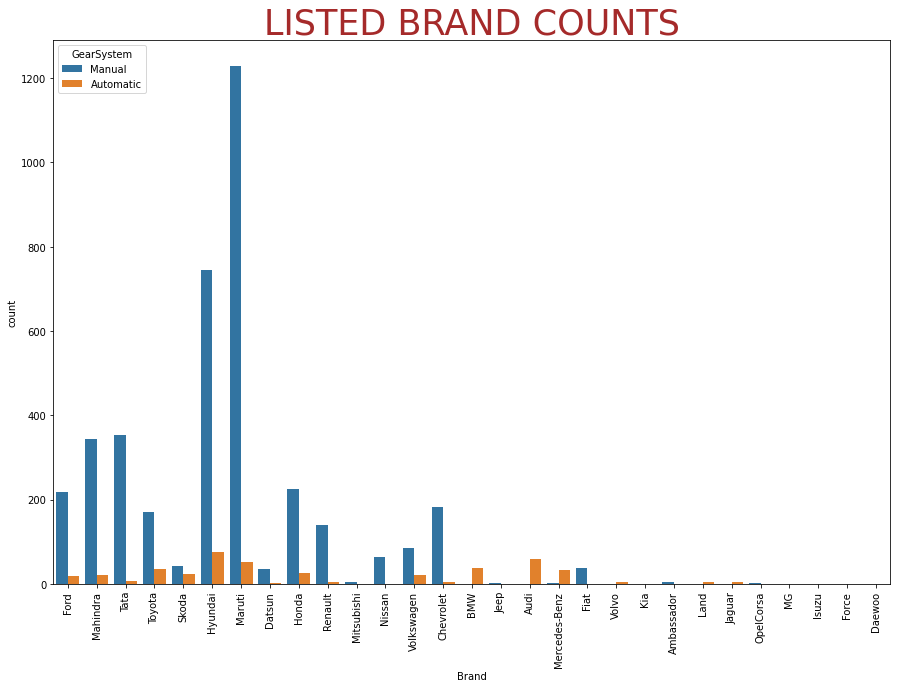

In [89]:
plt.figure(figsize=(15,10))
x = sns.countplot(data=df,
            x='Brand',hue='GearSystem')
plt.title("LISTED BRAND COUNTS", c="Brown",fontsize=35)
plt.xticks(rotation=90)
plt.show()

---
__Observation:__

It can be observed that Maruti has the highest number of cars listed on teh website the data was webscrapped from followed by Hyundai, Tata and Mahindra. The proportion of Automatic to Non-Automatic cars is also steep in nature.

---

# EDA

## Does the age of the car affect the price ?

Text(0.5, 0.98, 'Effect of Car Age on Price')

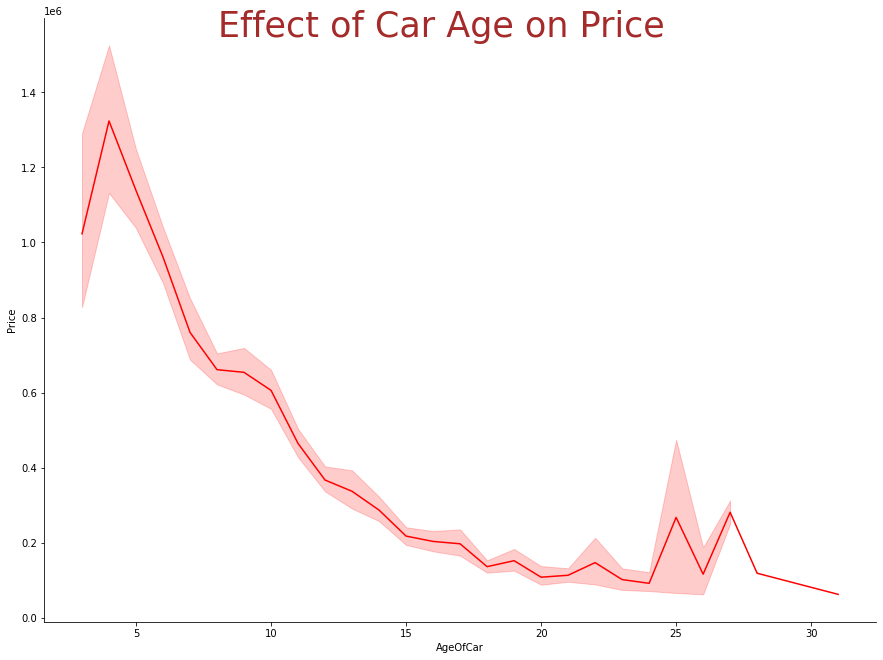

In [94]:
x = sns.relplot(data=df,y='Price',x='AgeOfCar',kind="line",color='red',
               height=9.27, aspect=13.7/10.27)
x.fig.suptitle("Effect of Car Age on Price", c="Brown",fontsize=35)

---
__Observation:__

- The age of car and price are inversely related, as the age of car increases the price its listed at decreases. Although, there is a small spike from 1 to 4 years, where the price surprisingly increases. This could be either because of well, maintanance or other market factors.

---

## Do the number of owners, that have owned a car impact its price ?

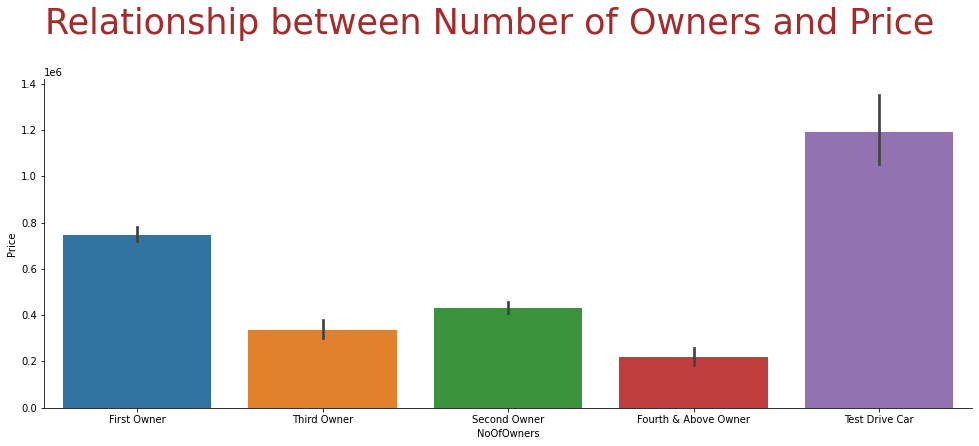

In [120]:
x= sns.catplot(data = df, x = 'NoOfOwners', y = 'Price', label = 'NoOfOwners vs Price',
           kind = 'bar',height=6.27, aspect=13.7/6.27)
x.fig.suptitle("Relationship between Number of Owners and Price", c="Brown",fontsize=35)
x.fig.subplots_adjust(top=0.82)
plt.show()

---
__Observation:__

- It can be understood from the dataset that as the car switches more hands, the price depreciates. The more the number of owners have been, the lesser the listed price. 

- Test drive cars have the highest average price, as they are probably the least used.


---

## What fuel type cars are mostly listed on the webscrapped dataset ?

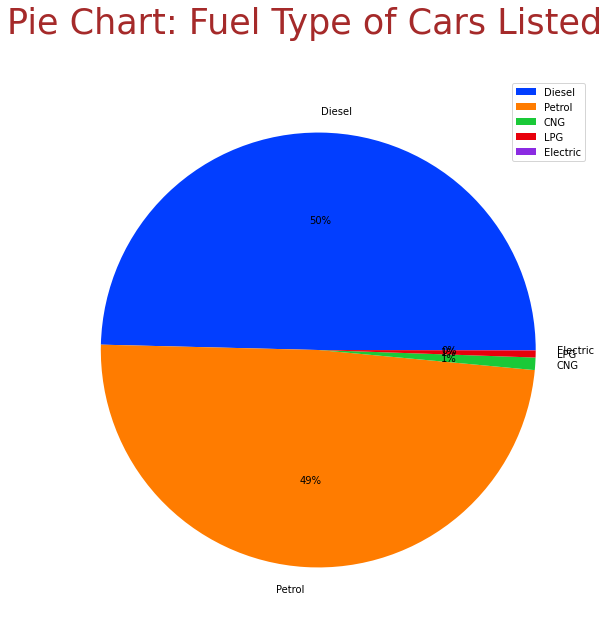

In [124]:
plt.figure(figsize=(15,10))
data = list(counts['FuelType'])
labels = ['Diesel', 'Petrol', 'CNG', 'LPG', 'Electric']
colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()
plt.suptitle("Pie Chart: Fuel Type of Cars Listed", c="Brown",fontsize=35)
plt.show()

---
__Observation:__

- It can be observed that majority of the cars run on "Diesel", closely followed by Petrol. The least number of cars run "Battery (electric)", i.e. only one car.

---

## Are there some particular brands that a dealer type sells? 

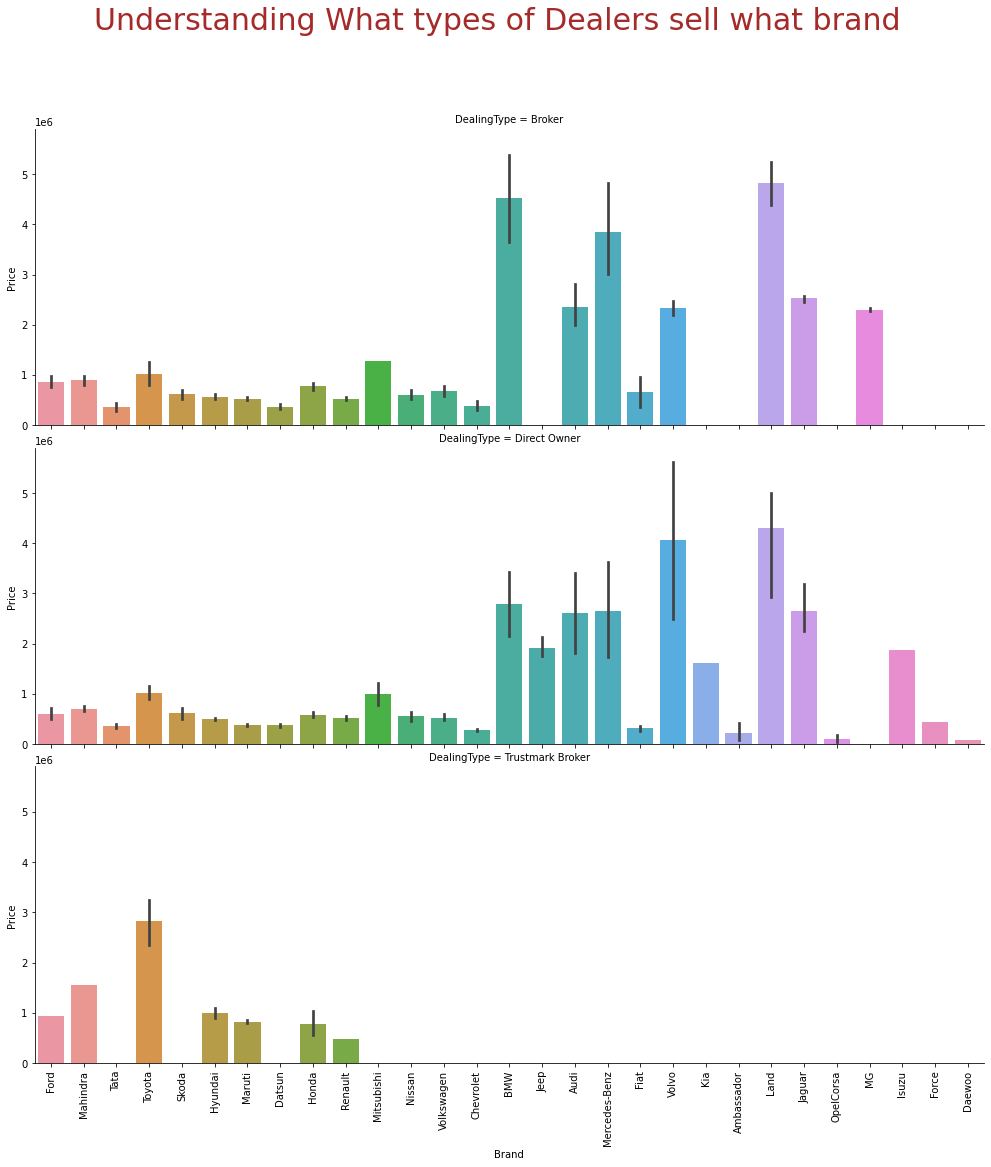

In [133]:
#Plotting a catplot to analyse the realationsship of type of dealer with brands and prices
x = sns.catplot(data = df,
           kind = 'bar',
           x = 'Brand',
           y = 'Price',
            row = 'DealingType',
           height=6.27, 
            aspect=11.7/5.27)


x.fig.suptitle('Understanding What types of Dealers sell what brand',
               fontsize=30, c='brown')

plt.subplots_adjust(bottom=0.2)
x.fig.subplots_adjust(top=0.89)

plt.xticks(rotation=90)
plt.show()


---
__Observation:__

- Trustmark Broker is only reserved for Ford, Mahindra, Toyota, Hyundai, Maruti, Honda and Renault. These brands generally target the average consumer / mass.
- Direct Owner, covers almost all different brands and also different vantage points.

---

## How does the number of previous owners affect the selling price of the car?

Text(0.5, 0.98, 'Understanding What types of Dealers sell what brand')

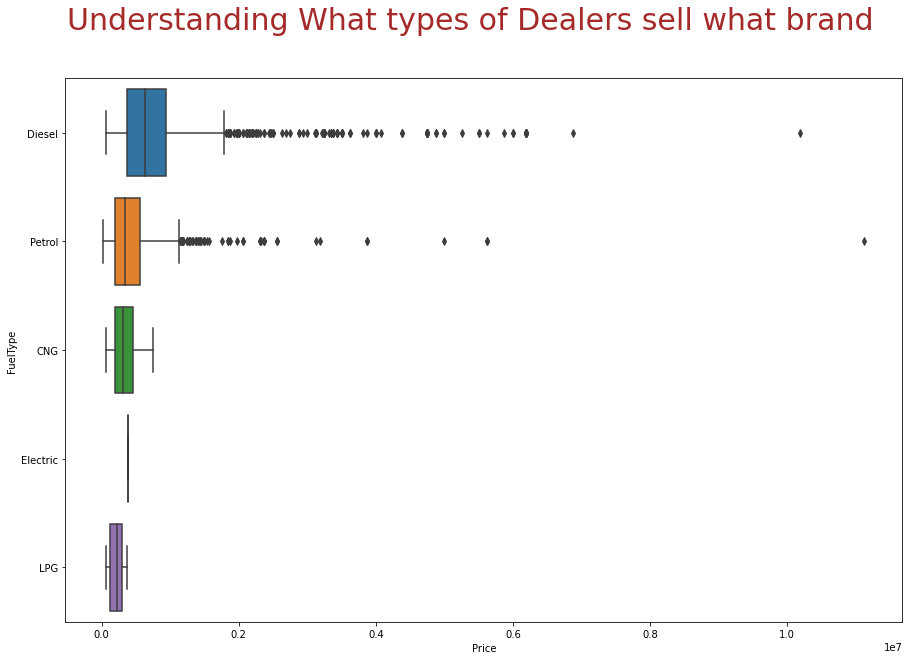

In [134]:
plt.figure(figsize=(15,10))
x = sns.boxplot(data=df,
           x='Price',
           y='FuelType')
plt.suptitle('Understanding What types of Dealers sell what brand',
               fontsize=30, c='brown')

In [136]:
df[df["Price"]==df.Price.max()]

,CarModel,AgeOfCar,Price,OdoMeterReading,FuelType,DealingType,GearSystem,NoOfOwners,Brand
2128,Audi RS7 2015-2019 Sportback Performance,7,11125000.0,17000,Petrol,Broker,Automatic,First Owner,Audi


---
__Observation:__

- Diesel Cars are slightly pricier than other cars. LPG and CNG cars seems to be listed with a cheaper price tag. What's interesting to note is that the most expensive car listed on the website is a petrol car, Its a seven year old, 2019 AUDI RS7 Sportback Performance Sports Car, listed at a whopping 1,11,25,000 rs on the website.

---

# Preparing the dataset for linear regression

In [126]:
trans_df.sample(5)

,Brand,AgeOfCar,OdoMeterReading,FuelType,NoOfOwners,Broker,Direct Owner,Trustmark Broker,Manual,Automatic,Price
1195,3,11,0.938795,1,0.0,0.0,1.0,0.0,0.0,1.0,1.126126
4091,10,14,0.938795,4,2.0,0.0,1.0,0.0,0.0,1.0,2.927928
4067,10,6,-1.194410,4,0.0,1.0,0.0,0.0,1.0,0.0,5.630631
1096,18,6,-0.315527,1,2.0,0.0,1.0,0.0,0.0,1.0,8.209459
534,17,13,0.509967,1,4.0,0.0,1.0,0.0,0.0,1.0,3.378378


In [37]:
# Dropping CarModel, as it will be redundant while performing Linear Regression
trans_df.drop(['CarModel'],axis=1,inplace = True)

In [38]:
#Inserting the brand feature as first position
brand_col = trans_df.pop("Brand")
trans_df.insert(0, "Brand",brand_col)

In [39]:
#Inserting the target variable at the last
brand_col = trans_df.pop("Price")
trans_df.insert(10, "Price",brand_col)

In [40]:
trans_df.sample(5)

,Brand,AgeOfCar,OdoMeterReading,FuelType,NoOfOwners,Broker,Direct Owner,Trustmark Broker,Manual,Automatic,Price
3738,10,14,-0.347689,4,0.0,0.0,1.0,0.0,0.0,1.0,3.153153
2782,18,18,-0.562103,4,2.0,0.0,1.0,0.0,0.0,1.0,0.675676
3650,17,8,3.082936,1,0.0,0.0,1.0,0.0,0.0,1.0,2.139640
2544,8,6,-0.133275,1,0.0,1.0,0.0,0.0,1.0,0.0,29.898649
350,18,9,-0.883724,4,0.0,0.0,1.0,0.0,0.0,1.0,1.013514


In [41]:
#Exporting the dataset
trans_df.to_csv("cleaned_dataset.csv",index=False)